# 数据集

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.datasets import make_blobs
x,y=make_blobs(
    n_samples=40,
    centers=2,
    random_state=0
)

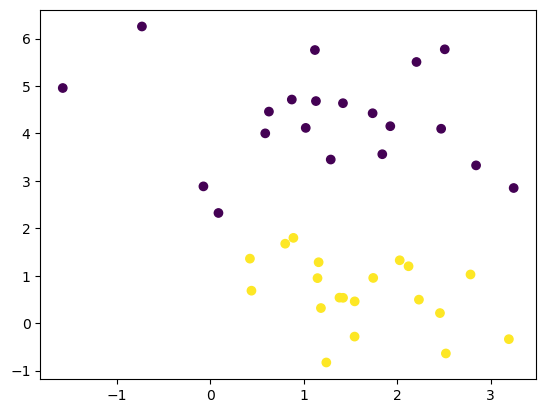

In [10]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

# sklearn中的线性SVM

In [16]:
from sklearn.svm import LinearSVC

In [17]:
clf=LinearSVC(C=1)

In [18]:
clf.fit(x,y)

LinearSVC(C=1)

In [19]:
clf.score(x,y)

1.0

In [20]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max=X[:,0].min()-1,X[:,0].max()+1
    axis_x2_min,axis_x2_max=X[:,1].min()-1,X[:,1].max()+1
    x1,x2=np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    z=clf.predict(np.c_[x1.ravel(),x2.ravel()])
    z=z.reshape(x1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#F5B9EF','#FFFFFF','#F9F9CB'])
    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c=y)

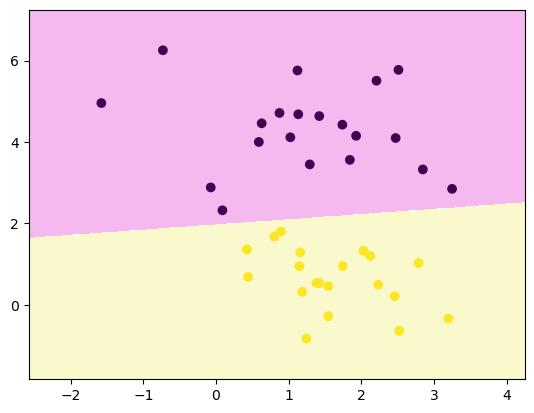

In [22]:
decision_boundary_plot(x,y,clf)

In [25]:
def plot_svm_margin(x,y,clf,ax=None):
    from sklearn.inspection import DecisionBoundaryDisplay
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1,0,1],
        alpha=0.5,
        linestyles=["--","-","--"],
    )
    plt.scatter(x[:,0],x[:,1],c=y)

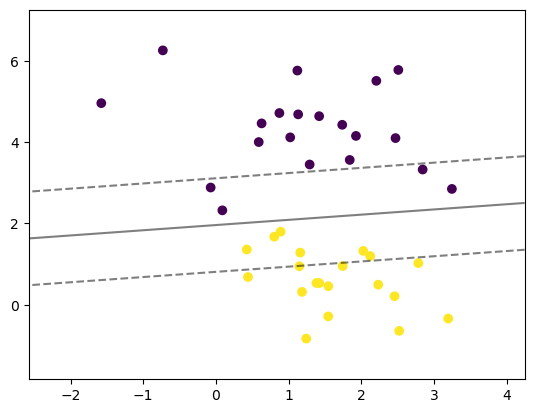

In [26]:
plot_svm_margin(x,y,clf)
plt.show()

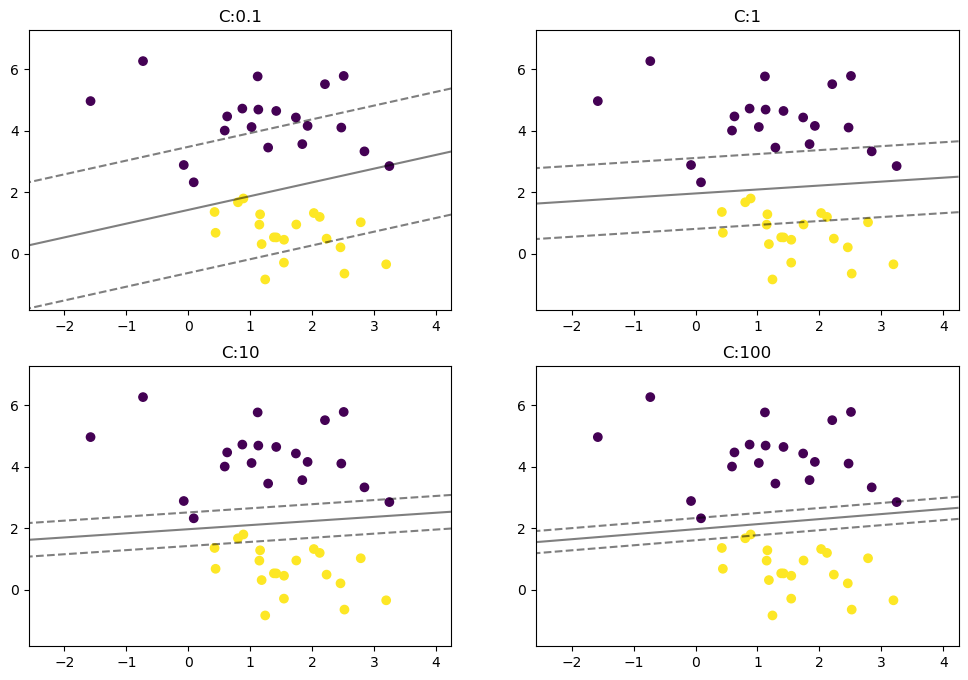

In [27]:
plt.rcParams["figure.figsize"]=(12,8)

params=[0.1,1,10,100]
for i,c in enumerate(params):
    clf=LinearSVC(C=c,random_state=0)
    clf.fit(x,y)
    
    ax=plt.subplot(2,2,i+1)
    plt.title("C:{0}".format(c))
    plot_svm_margin(x,y,clf,ax)
plt.show()

# 多分类

In [28]:
from sklearn import datasets
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [30]:
clf=LinearSVC(C=0.1,multi_class='ovr',random_state=0)#multi_class默认值就是ovr，不支持ovo
clf.fit(x,y)

LinearSVC(C=0.1, random_state=0)

In [33]:
clf.predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])